# Generating the code for the Neural Network Estimation

## Libraries importieren

In [1]:
# Import the necessary libraries
import pandas as pd

## Daten einladen

In [2]:
# import the pickle files from the github repository

training_features_path = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/3_Model/Neuronales_Netz/pickle_data/training_features.pkl"
validation_features_path = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/3_Model/Neuronales_Netz/pickle_data/validation_features.pkl"
training_labels_path = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/3_Model/Neuronales_Netz/pickle_data/training_labels.pkl"
validation_labels_path = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/3_Model/Neuronales_Netz/pickle_data/validation_labels.pkl"

# Read the pickle files

training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())

Loaded Training features dimensions: (1462, 14)
Loaded Validation features dimensions: (357, 14)

Loaded Training labels dimensions: (1462, 6)
Loaded Validation labels dimensions: (357, 6)

First few rows of loaded training features:
   0   1   2   3   4   5   6   7   8   9   10  11  12  13
0   1   0   0   0   0   0   0   0   0   1   0   1   0   0
1   1   0   0   1   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   0   0   0   0   0   1   1
3   0   0   0   0   0   0   0   0   0   0   1   0   0   0
4   1   0   0   0   0   0   0   1   0   0   0   1   0   0

First few rows of loaded training labels:
            0           1           2           3           4           5
0  195.399801  395.242017  137.024358  118.865410  275.561445   69.400013
1  161.443574  612.243855  315.867117   76.277148  334.375656    0.000000
2  141.124541  552.631235  203.476569   91.759601  357.732101    0.000000
3  102.805573  588.469539  199.263308  106.105028  310.473798  119.152733
4  13

## Converting loaded dataframes to numpy arrays for further calculations

In [3]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

# gibt die ersten 5 Zeilen aus -> sind ja jetzt dummy codiert
print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[1 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 1 0 0]]


## Defining Neural Network
Using Sequential model definition from Keras with batch normalization and dense layers

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

2024-06-21 10:58:01.882751: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 10:58:02.979362: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 10:58:05.315051: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 10:58:06.517747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
# defining model, input shape nimmt aus shape die Zweite Zahl (Zahl der Spalten)
model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(8, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335 (1.31 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 28 (112.00 B)

## Compiling and training model

In [6]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=17, batch_size=32,
                    validation_data=(validation_features, validation_labels))

Epoch 1/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 55937.8633 - val_loss: 47539.7148
Epoch 2/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56111.2109 - val_loss: 47354.3320
Epoch 3/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55396.7188 - val_loss: 46893.6016
Epoch 4/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54607.0469 - val_loss: 45755.2227
Epoch 5/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54317.5078 - val_loss: 43217.1445
Epoch 6/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48277.3398 - val_loss: 38195.5156
Epoch 7/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42519.5000 - val_loss: 30345.8008
Epoch 8/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34081.0117 - val_loss: 23556.2578
Epoch 9/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28228.1562 - val_loss: 21488.5273
Epoch 10/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27531.2520 - val_loss: 21196.3906
Epoch 11/17
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26935.0078 - val_los

## Savin model for furture use

In [7]:
model.save("python_model.h5")

## Plotting training history

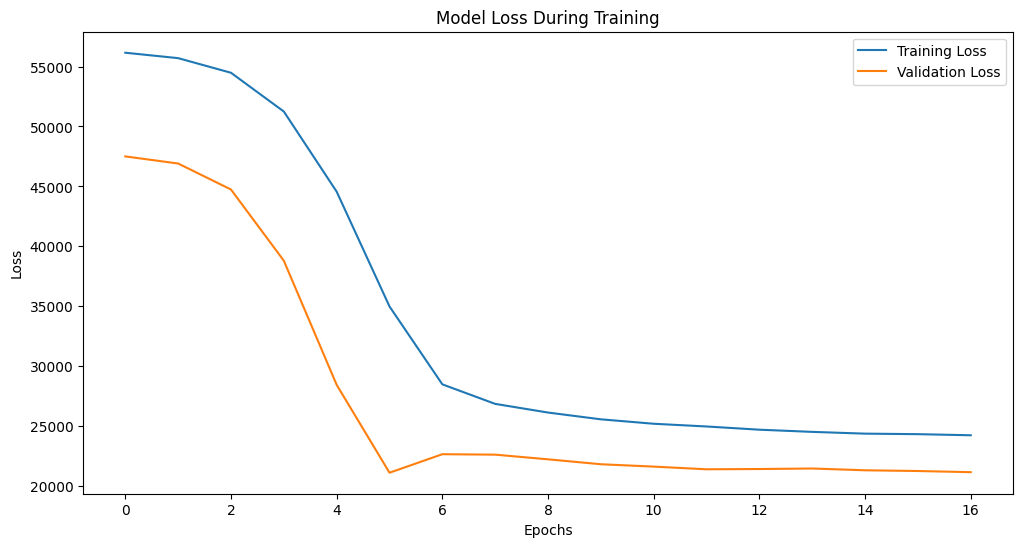

In [22]:
import matplotlib.pyplot as plt

# hier kann es hilfreich sein die visualisierung zu beschneiden, um den Verlauf besser zu sehen
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predictions and evaluations of the model

In [23]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred) # hier werden die Werte in Numpy Arrays überführt für die folgenden Berechnungen
    non_zero_mask = y_true != 0 # es wird eine Maske erstellt, die alle Werte ungleich 0 markiert um eine Division durch 0 zu verhindern
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%") # .2f heißt Gleitkommazahl mit zwei Dezimalstellen
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

 1/46 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step


IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 6

In [30]:
# Chatgpt Code
# Normalize the data (optional, but recommended)
from sklearn.preprocessing import StandardScaler

scaler_feat = StandardScaler()
scaler_label = StandardScaler()

training_features = scaler_feat.fit_transform(training_features)
validation_features = scaler_feat.transform(validation_features)

training_labels = scaler_label.fit_transform(training_labels)
validation_labels = scaler_label.transform(validation_labels)

# Build the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# defining model, input shape nimmt aus shape die Zweite Zahl (Zahl der Spalten)
model_CGPT = Sequential([
  Dense(64, input_dim=training_features.shape[1], activation='relu'),
    Dense(64, activation='relu'),
  Dense(training_labels.shape[1], activation='linear')
])

model_CGPT.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model_CGPT.fit(training_features, training_labels, epochs=100, batch_size=32, validation_data=(validation_features, validation_labels))

# Evaluate the model
loss = model_CGPT.evaluate(validation_features, validation_labels)
print(f'Validation Loss: {loss}')

# Predicting the sales volumes for the validation set
predictions = model_CGPT.predict(validation_features)

# Inverse transform the predictions and actual values to get the original scale
validation_labels_inverse = scaler_label.inverse_transform(validation_labels)
predictions_inverse = scaler_label.inverse_transform(predictions)

# Display the first few predictions and actual values
print("First few predictions:\n", predictions_inverse[:5])
print("First few actual values:\n", validation_labels_inverse[:5])


Epoch 1/100


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0590 - val_loss: 47634.7500
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9153 - val_loss: 47633.6992
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9680 - val_loss: 47637.6875
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9324 - val_loss: 47629.5234
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9801 - val_loss: 47635.4609
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0767 - val_loss: 47640.0742
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8994 - val_loss: 47632.7188
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9075 - val_loss: 47630.8477
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0341 - val_loss: 47642.7344
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9072 - val_loss: 47628.8516
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9167 - val_loss: 47631.1758
Epoch 12/100
46/46 ━━━━━━━━━━━━